<img src="https://github.com/fabiorolim/dados_meteorologicos_oeiras/blob/master/ICON%20APP%20tempo%20IFPI%20Oeiras.png?raw=true" height="80px" width="80px">

# Análise dos dados meteorológicos de 2020 em Oeiras, Piauí.







<img src="https://github.com/fabiorolim/dados_meteorologicos_oeiras/blob/master/daves.jpg?raw=true" height="220px" width="420px">

Este artigo apresenta uma análise dos dados meteorologicos do ano de 2020, da cidade de Oeiras - PI, coletados apartir da estação meteorologica [Daves Vantage Pro 2](https://www.davisinstruments.com/solution/vantage-pro2/), instalada no Instituto Federal do Piauí, Campus Oeiras.

Um raspiberry pi conectado ao console da estação envia os dados da primeira leitura do dia para o sistema online, às 00h:05m, as demais leituras são realizadas a cada 30 minutos, exceto a última do dia às 23h:59m.

Todos os dados utilizados neste estudo podem ser acessados através do [sistema Cruviana](https://cruviana.ifpi.edu.br/oeiras/).

## A cidade
<img src="https://github.com/fabiorolim/dados_meteorologicos_oeiras/blob/master/IMG_6955.jpg?raw=true" height="220px" width="420px">

Oeiras é um município brasileiro do estado do Piauí, localizado na latitude 07º01'30" sul e longitude 42º07'51" oeste. A cidade possui 2.720km² de extensão territórial e está situada bem ao centro do estado.

O clima tropical semiárido é predominante na região do municipio piauiense, onde nos meses mais quentes, as temperaturas chegam a ultrapassar os 40⁰C.

O Rio Canindé, que corta a primeira capital do estado, é temporario, seu volume de águas está mais elevado na época das chuvas, que se concentram em torno de 4 meses do ano.



## Obtenção dos dados

Os dados analisados foram obtidos por meio de download no  [sistema Cruviana](https://cruviana.ifpi.edu.br/oeiras/). Para baixar o arquivo em formato cvs é necessário informar o intervalo de datas desejado. A data inicial informada no sistema foi 01/01/2020 e a data final foi 31/12/2020. Após download, o arquivo baixado foi anexado ao repositório no [github](https://https://raw.githubusercontent.com/fabiorolim/dados_meteorologicos_oeiras/master/dados_2020.csv) para importação neste notebook.





### Importando os dados



In [4]:
# Importandos bibiotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Cria dataframe com o csv através do pandas
url = 'https://raw.githubusercontent.com/fabiorolim/dados_meteorologicos_oeiras/master/dados_2020.csv'
 
df = pd.read_csv(url, parse_dates=True, index_col='Datetime')

## Informações acerca do banco de dados

A base de dados é composta por 16.256 linhas ou registros, cada um corresponde a uma leitura feita pela estação, e 23 colunas ou variáveis.

In [5]:
# Obtem informações sobre os dados
print('Informação sobre a base dados')
print(f'Número de linhas: {df.shape[0]}')
print(f'Número de colunas: {df.shape[1]}')

Informação sobre a base dados
Número de linhas: 16256
Número de colunas: 23


In [6]:
# Exibe 5 entradas do banco de dados
df.head()

,id,Data,Data_add,BarTrend,Barometer,TempOut,WindSpeed,WindSpeed10Min,WindDir,HumOut,RainRate,SolarRad,RainDay,RainMonth,RainYear,ETDay,ETMonth,ETYear,RainStorm,HeatIndex,WindChill,THSWIndex,Station
Datetime,,,,,,,,,,,,,,,,,,,,,,,
2020-11-15 19:05:04.195032,27595,2020-11-15,2020-11-15,0.0,29.642,30.4,0,0,339,60.0,NaN,0.0,0.0,109.6,1040.0,5.5,60.7,1525.8,NaN,33.3,30.6,32.2,1
2020-11-29 00:05:03.927226,28239,2020-11-29,2020-11-29,0.0,29.821,22.1,0,0,351,83.0,NaN,0.0,0.0,156.2,1086.6,0.0,121.7,1586.7,NaN,22.8,22.2,21.7,1
2020-12-14 02:35:03.445601,28883,2020-12-14,2020-12-14,236.0,29.730,22.7,0,0,337,80.0,NaN,0.0,0.0,39.4,1126.0,0.1,64.0,1662.2,NaN,23.3,22.8,22.8,1
2020-12-29 01:05:03.821005,29527,2020-12-29,2020-12-29,236.0,29.675,23.1,0,0,6,78.0,NaN,0.0,0.0,87.6,1174.2,0.0,127.0,1725.2,NaN,23.9,23.3,22.8,1
2020-11-02 10:22:42.659601,26952,2020-11-02,2020-11-02,20.0,29.765,26.1,0,0,222,86.0,NaN,60.0,10.6,10.6,941.0,0.3,4.6,1469.6,NaN,28.9,26.1,29.4,1


### Dicionário de dados


*   **Datetime**: Tempo preciso em que a leitura ocorreu em formato americano;
*   **id:** Identificador único da leitura;
*   **Data_add:** Data em que a leitura ocorreu em formato americano;
*   **BarTrend:** Tendência da pressão para 3h;
*   **Barometer:** Pressão barométrica;
*   **TempOut:** Temperatura do ar em grau em (⁰C);
*   **WindSpeed:** Velocidade do vento em (km/h);
*   **WindSpeed10Min:** Média de velocidade do vento nos últimos 10 minutos em (km/h);
*   **WindDir:** Direção do vento em (⁰);
*   **HumOut:** Umidade relativa do ar em (%);
*   **RainRate:** Volume de chuva por hora (mm);
*   **SolarRad:** Radiação solar em (W/m²);
*   **RainDay:** Volume de chuva acumulado no dia em (mm);
*   **RainMonth:** Volume de chuva acumulado no Mês em (mm);
*   **RainYear:** Volume de chuva acumulado no ano em (mm);
*   **ETDay:** Volume de evapotranspiração acumulado no dia em (mm);
*   **ETMonth:** Volume de evapotranspiração acumulado no mês em (mm);
*   **ETYear:** Volume de evapotranspiração acumulado no ano em (mm);
*   **RainStorm:** Volume de chuva considerada tempestade (mm);
*   **HeatIndex:** Índice de calor em (⁰C);
*   **WindChill:** Sensação térmica considerando vento (⁰C);
*   **THSWIndex:** Sensação térmica considerando umidade, radiação solar, vento e temperatura;
*   **Station:** Identificador da estação meteorológica.

## Removendo dados

Antes da etapada de exploração dos dados, buscou-se por variáveis com valores nulos ou que não serão utilizadas para análise no momento.



In [12]:
# Exibe todas as variáveis e o percentual de valores nulos 
print(f'{(df.isnull().sum()/df.shape[0])*100}')

id                  0.0
Data                0.0
Data_add            0.0
BarTrend            0.0
Barometer           0.0
TempOut             0.0
WindSpeed           0.0
WindSpeed10Min      0.0
WindDir             0.0
HumOut              0.0
RainRate          100.0
SolarRad            0.0
RainDay             0.0
RainMonth           0.0
RainYear            0.0
ETDay               0.0
ETMonth             0.0
ETYear              0.0
RainStorm         100.0
HeatIndex           0.0
WindChill           0.0
THSWIndex           0.0
Station             0.0
dtype: float64


In [8]:
# Cria uma cópia do dataframe original
df_clean = df.copy()
# Remove todas as variáveis com dados nulos e que não serão utilizadas na análise. 
df_clean = df_clean.drop(columns=['id', 'RainRate', 'RainStorm', 'BarTrend', 'Barometer', 'WindSpeed10Min', 'Station', 'HeatIndex', 'WindChill', 'THSWIndex'])
display(df_clean.head())

,Data,Data_add,TempOut,WindSpeed,WindDir,HumOut,SolarRad,RainDay,RainMonth,RainYear,ETDay,ETMonth,ETYear
Datetime,,,,,,,,,,,,,
2020-11-15 19:05:04.195032,2020-11-15,2020-11-15,30.4,0,339,60.0,0.0,0.0,109.6,1040.0,5.5,60.7,1525.8
2020-11-29 00:05:03.927226,2020-11-29,2020-11-29,22.1,0,351,83.0,0.0,0.0,156.2,1086.6,0.0,121.7,1586.7
2020-12-14 02:35:03.445601,2020-12-14,2020-12-14,22.7,0,337,80.0,0.0,0.0,39.4,1126.0,0.1,64.0,1662.2
2020-12-29 01:05:03.821005,2020-12-29,2020-12-29,23.1,0,6,78.0,0.0,0.0,87.6,1174.2,0.0,127.0,1725.2
2020-11-02 10:22:42.659601,2020-11-02,2020-11-02,26.1,0,222,86.0,60.0,10.6,10.6,941.0,0.3,4.6,1469.6


## Distribuição das variáveis

A verificação da distribuição dos dados permite detectar anomalias e outliers que podem comprometer a análise. 

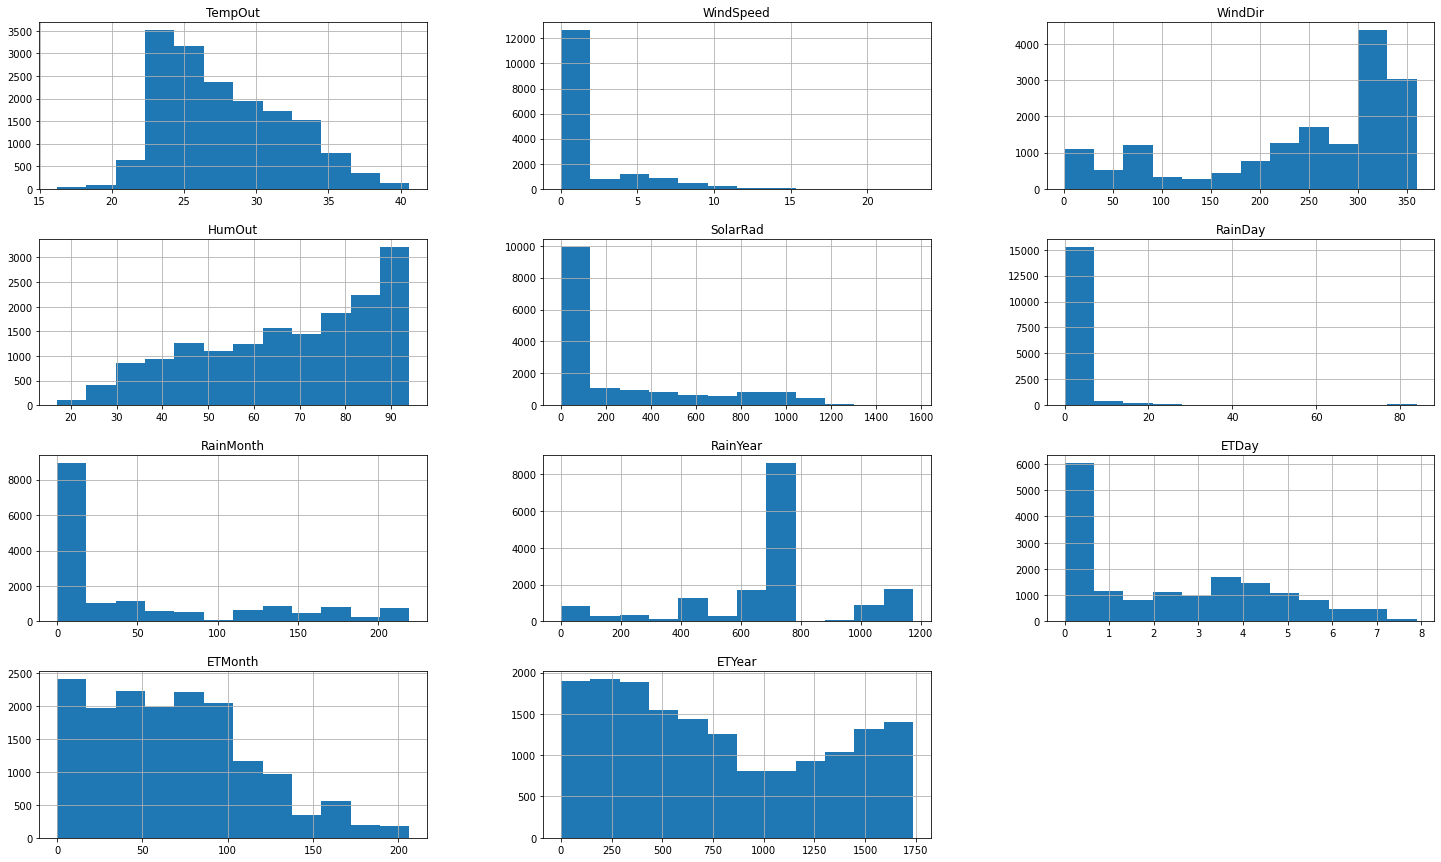

In [47]:
# Cria histogramas com as variáveis do modelo
df_clean.hist(figsize=(25, 15), bins=12);

## Análise da temperatura

In [38]:
# Exibe informações estatisticas acerca da temperatura do ar
df_clean.TempOut.describe()

count    16256.000000
mean        27.778266
std          4.277148
min         16.200000
25%         24.300000
50%         26.950000
75%         30.900000
max         40.600000
Name: TempOut, dtype: float64

Como visto acima, a média de temperatura anual da cidade de Oeiras, em 2020 foi de aproximadamente 27,8⁰C. O desvio padrão foi de aproximadamente 4,3 ⁰C. A menor temperatura registrada foi de 16,2⁰C, equanto a maior foi 40,6⁰C. 
Através do gráfico abaixo, pode-se visualizar a amplitude dos valores da temperatura, a mediana e os valores predominantes.

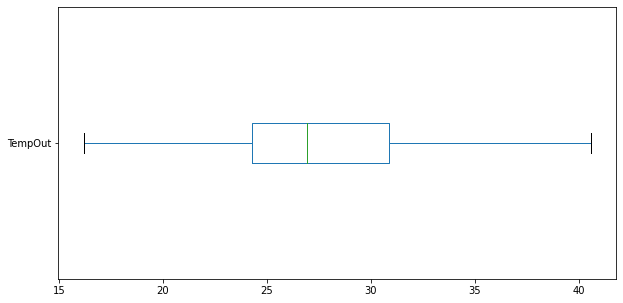

In [37]:
#Boxplot para TempOut
df_clean.TempOut.plot(kind='box', vert=False, figsize=(10, 5))
plt.show()

### Qual dia do ano registrou a temperatura mais alta ?


In [39]:
# Retorna o Datetime correspoendete ao maior valor de TempOut
df_clean.loc[df_clean.TempOut == df_clean.TempOut.max(), ['TempOut']]


,TempOut
Datetime,
2020-10-04 16:05:03.677221,40.6


A maior temperatura do ano foi registrada no dia 04 de outubro às 16:05m.

### Qual dia do ano registrou a temperatura mais baixa ?

In [40]:
# Retorna o Datetime correspoendete ao menor valor de TempOut
df_clean.loc[df_clean.TempOut == df_clean.TempOut.min(), ['TempOut']]

,TempOut
Datetime,
2020-07-03 05:35:03.653638,16.2


A menor temperatura do ano foi registrada no dia 03 de julho às 05h:35m.

### Qual foi o dia com a maior média de temperatura ?

In [41]:
dias_media_temperatura = df_clean.groupby(['Data_add']).TempOut.mean().sort_values()
display(dias_media_temperatura[-1:])

Data_add
2020-10-16    33.491667
Name: TempOut, dtype: float64

O dia 16/10/2020 registrou a maior média de temperatura com aproximadamente 33,5 ⁰C.

### Qual foi o dia com a menor média de temperatura?

In [42]:
display(dias_media_temperatura[:1])

Data_add
2020-05-16    21.24375
Name: TempOut, dtype: float64

O dia 16/05/2020 registrou a menor média de temperatura com 21,2 ⁰C.

### Quais as médias de temperaturas em cada mês ?

In [43]:
# Agrupa os dados por mês e retorna calcula a média de temperatura 
temperaturas_meses = df_clean.groupby(by=[df_clean.index.month]).TempOut.mean().sort_index()
display(temperaturas_meses.sort_values(ascending=False))

Datetime
10    31.630481
9     30.608438
8     28.517603
12    28.127778
11    28.022555
7     27.394382
6     26.959929
2     26.812805
5     26.794690
1     26.484312
4     26.464674
3     26.333883
Name: TempOut, dtype: float64

Conforme a lista acima, outubro foi o mês com a maior média de temperatura com 31,6 ⁰C, seguido por setembro, com 30,6 ⁰C e agosto com 28,5 ⁰C.  Já o mês de março registrou 26,3 ⁰C, a menor média de temperatura.

O gráfico abaixo o possbilita a visualização das médias de temperaturas durante o ano.


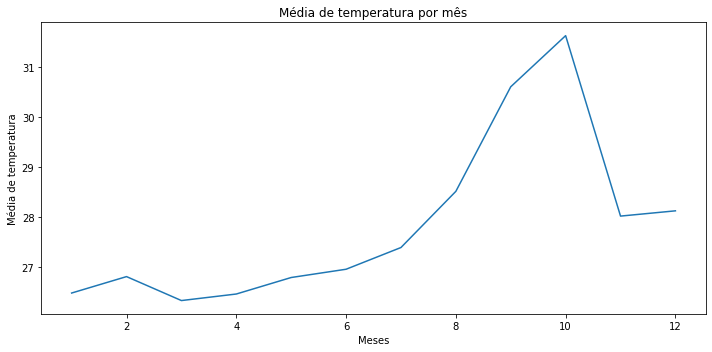

In [22]:
# Plota o gráfico de médias de temperaturas por mês
fig, ax = plt.subplots(figsize=(10, 5))
temperaturas_meses.plot(kind='line', ax=ax)
ax.set_title('Média de temperatura por mês')
ax.set_xlabel('Meses')
ax.set_ylabel('Média de temperatura')
plt.tight_layout()

## Análise das chuvas

### Qual foi o volume total de chuvas ?

In [45]:
# Retorna o valor máximo da variável RainYear no dia 31/12/2019.
print(f"O volume total das chuvas em 2020 foi: {df_clean.loc[df_clean.Data_add=='2020-12-31'].RainYear.max()}mm")

O volume total das chuvas em 2020 foi: 1174.2mm


### Quais os meses mais chuvosos ?

In [46]:
#Ordena os meses em ordem crescente de volume de chuva
meses_e_chuvas = meses_e_chuvas.sort_values(ascending=False)
display(meses_e_chuvas)


Datetime
4     219.2
3     219.2
1     208.8
2     182.8
11    156.2
12     87.6
5      56.4
10     43.2
6      34.2
7       1.6
9       0.0
8       0.0
Name: RainMonth, dtype: float64

A listagem acima exibe os meses e seus volumes de chuvas ordenados em ordem decrescente. Abril foi o mês com maior volume de chuvas, seguido por março e janeiro.

Através do gráfico abaixo, pode-se visualizar a distribuição das chuvas durante o ano.

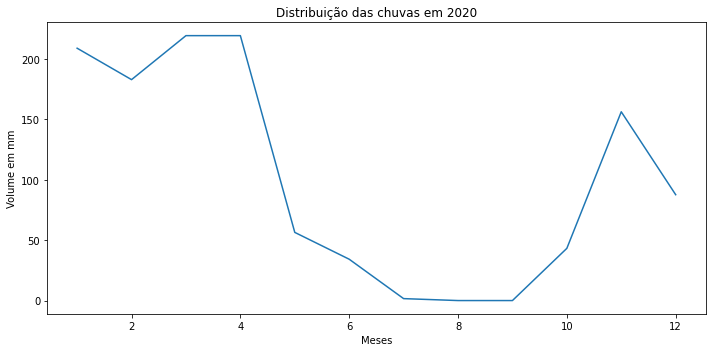

In [44]:
# Retorna os meses em ordem crescente e seus respectivos volumes de chuva
meses_e_chuvas = df_clean.groupby(by=[df_clean.index.month]).RainMonth.max().sort_index() 

#Plota gráfico de linha para chuvas
fig, ax = plt.subplots(figsize=(10,5))
meses_e_chuvas.plot(kind='line', ax=ax)
ax.set_title('Distribuição das chuvas em 2020')
ax.set_xlabel('Meses')
ax.set_ylabel('Volume em mm')
plt.tight_layout()

###Em quantos dias houve chuvas?

In [28]:
# Retorna uma lista com todos os dias onde a variável RainDay foi maior que 0
dias_chuvosos = (df_clean.loc[df_clean.RainDay > 0, ['Data_add']]).Data_add.unique()

# Quantidade de dias chuvosos
print(f'Em 2020 houve {len(dias_chuvosos)} dias com precipitações')

Em 2020 houve 126 dias com precipitações


### Qual o volume de chuva por dia ?


In [48]:
# Valume de chuva em cada um dos dias
(df_clean.loc[df_clean.RainDay > 0, ['Data_add', 'RainDay']]).groupby(['Data_add']).RainDay.max().sort_values(ascending=False)

Data_add
2020-11-04    84.0
2020-03-07    77.4
2020-03-08    77.4
2020-01-19    76.6
2020-02-04    55.2
              ... 
2020-02-06     0.2
2020-10-10     0.2
2020-10-09     0.2
2020-07-14     0.2
2020-06-27     0.2
Name: RainDay, Length: 126, dtype: float64

Conforme a lista acima o dia que houve o maior volume de chuva foi 04/11/2020, com 84mm, seguido por 07/03/2020, com 77,4mm e 08/03/2020, também com 77,4mm. 


## Análise da umidade relativa do ar

A umidade relativa do ar consiste na quantidade de vapor de água existente na atmosfera. O que caracteriza se o ar está seco ou úmido.

O gráfico abaixo apresenta a média da umidade do ar por mês durante o ano de 2020.


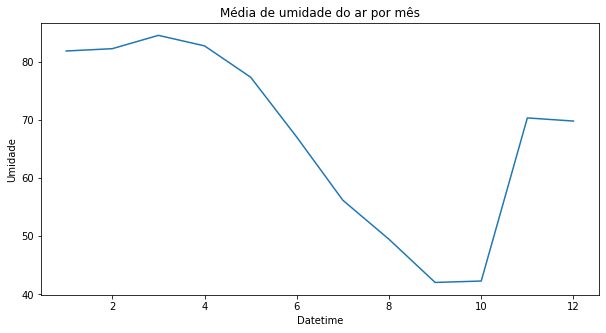

In [30]:
# Calcula a média da umidade por mês
media_umidade_mes = df_clean.HumOut.groupby(by=[df_clean.index.month]).mean()

# PLota o gráfico de média de umidade do ar por mês
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Média de umidade do ar por mês')
ax.set_xlabel('Mês')
ax.set_ylabel('Umidade')
media_umidade_mes.plot(kind='line', ax=ax);

### Quais as médias de umidade em cada mês ?

In [31]:
display(media_umidade_mes.sort_values(ascending=False))

Datetime
3     84.569484
4     82.760137
2     82.275915
1     81.878223
5     77.367988
11    70.363504
12    69.821481
6     67.058156
7     56.190350
8     49.480992
10    42.295029
9     42.052344
Name: HumOut, dtype: float64

A listagem acima exibe os meses e suas respectivas médias de umidade relativa do ar em ordem decrescente. Como visto, março foi o mês com a maior média, com 84,5%, seguido por abril, com 82,7% e fevereiro com 82,2%. Setembro foi o mês com o ar mais seco, registrando uma média de 42% de umidade.  

### Qual o dia mais umido e o mais quente do ano ?

In [32]:
# Calcula a média da umidade por dia
medias_umidade_dias = df_clean.HumOut.groupby(by=[df_clean.Data_add]).mean()

# Retorna a data com maior média de umidade
display(medias_umidade_dias.sort_values(ascending=False)[:1])

# Retorna a data com a menor média de umidade
display(medias_umidade_dias.sort_values(ascending=False)[-1:])

Data_add
2020-01-19    91.139535
Name: HumOut, dtype: float64

Data_add
2020-09-03    31.866667
Name: HumOut, dtype: float64

Conforme visto acima, 19/01/2020 foi o dia mais úmido do ano, com 91,1% de úmidade média, enquanto 03/09/2020 foi o dia mais seco, com 31,8% de umidade média. 

## Análise dos ventos

### Quando e qual foi a maior velocidade do vento ? 

In [33]:
# Retorna o maior valor de WindSpeed
df_clean.loc[df_clean.WindSpeed == df_clean.WindSpeed.max(), ['WindSpeed']]

,WindSpeed
Datetime,
2020-07-21 09:05:03.329129,23


A maior velocidade do vento foi 23km/h, registrada no dia 21/07/2020 às 09h:05m.

### Qual direção do vento é predominante ?

In [34]:
# Vento predominante
df_clean.WindDir.describe()

count    16256.000000
mean       241.641425
std        106.428316
min          1.000000
25%        190.000000
50%        288.000000
75%        323.000000
max        360.000000
Name: WindDir, dtype: float64

Como visto acima, a direção o vento predominante é 323⁰. O gráfico abaixo mostra a frequência em relação a direção do vento.


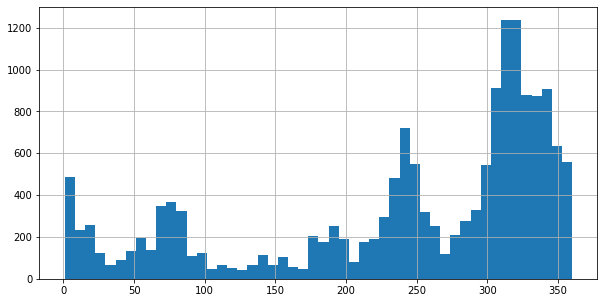

In [35]:
df_clean.WindDir.hist(figsize=(10, 5), bins=50, grid=True);

O gráfico abaixo exibe a distribuição da direção do vento e a velocidade.

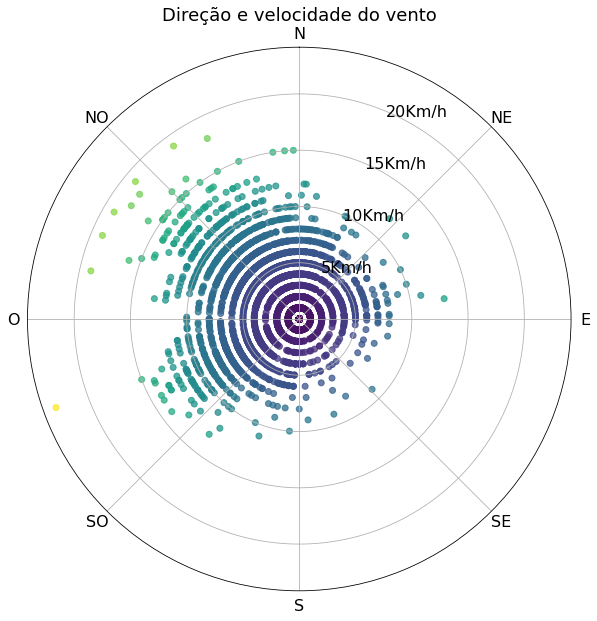

In [49]:
import numpy as np

direcao = df_clean.WindDir.sort_index()

velocidade = df_clean.WindSpeed.sort_index()

graus = direcao * np.pi / 180
cor = velocidade

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1, projection='polar')
ax.set_title('Direção e velocidade do vento', fontdict={'fontsize': '18', 'verticalalignment': 'center_baseline'})
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')
ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SO', 'O', 'NO'], fontdict={'fontsize': '16', 'verticalalignment': 'center_baseline', 'horizontalalignment': 'center'})
ax.set_xmargin(0.2)
ax.set_yticklabels(['5Km/h', '10Km/h', '15Km/h', '20Km/h', '25Km/h'], fontdict={'fontsize': '16', 'verticalalignment': 'center_baseline'} )
c = ax.scatter(graus, velocidade, c=cor, alpha=0.75)
